# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas


In [ ]:
import pandas as pd
import numpy as np #Funções matemáticas
import seaborn as sns #Gerar gráficos
import matplotlib.pyplot as plt #Gerar gráficos
import pickle #Gravar variáveis
from sklearn.preprocessing import StandardScaler #Colocar os dados no mesmo padarão (mesma escala)
from sklearn.cluster import KMeans #Realizar a segmentação do mercado / Agrupamento dos clientes
from sklearn.decomposition import PCA #Reduzir a dimensionalidade dos dados

In [ ]:
creditcard_df = pd.read_csv('/content/marketing_data.csv')
print(f'Os {creditcard_df.shape[0]} clientes terão {creditcard_df.shape[1]} características')

18 características que os 8950 clientes terão


In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### **Balance**
Os clientes mantém na conta corrente em média 1564.47$ para fazer compras no cartão de débito

### **Balance_Frequency**
Em média a frequencia de atualização do saldo da contaa corrente é de 87,7% 

### **Purchases**
Valor médio das compras é de 1000$

### **Comparação entre ONEOFF_PURCHASES (a vista) e INSTALLMENTS_PURCHASES (parcelado)**
A vista: em média 592$  

Parcelado: em média 411$  

*Pode ser um grupo de pessoas*

### **Cash_Advance**
Em média, as pessoas sacam mais dinheiro do limite do cartão de crédito do que fazer compras parceladas e a vistas  

Pode ser ruim pros clientes mas é bom pro banco pq os juros são altos  

*Pode ser um grupo de pessoas*

### **Comparação entre ONEOFF_PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY**
As pessoas realizam mais compras parcelado (0.364437) do que a vista (0.202458)

### **PRC_FULL_PAYMENT**
15% dos clientes pagam o valor completo da fatura



## Visualização e exploração dos dados

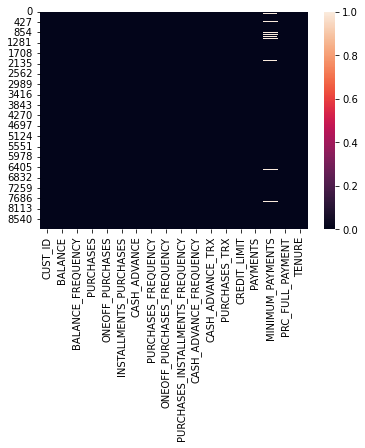

In [ ]:
#Vamos tratar os consumidores que possuem campos nulos
sns.heatmap(creditcard_df.isnull()) #O campo MINIMUM_PAYMENTS possui valores nulos

In [ ]:
creditcard_df.isnull().sum() #Contagem de valores nulos

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Vamos preencher os valores nulos com a média
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum() #Contagem de valores nulos

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.duplicated().sum() #Contagem de valores duplicados

0

In [ ]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True) #Removendo id do cliente (Não é necessário ter PK no machine learning)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

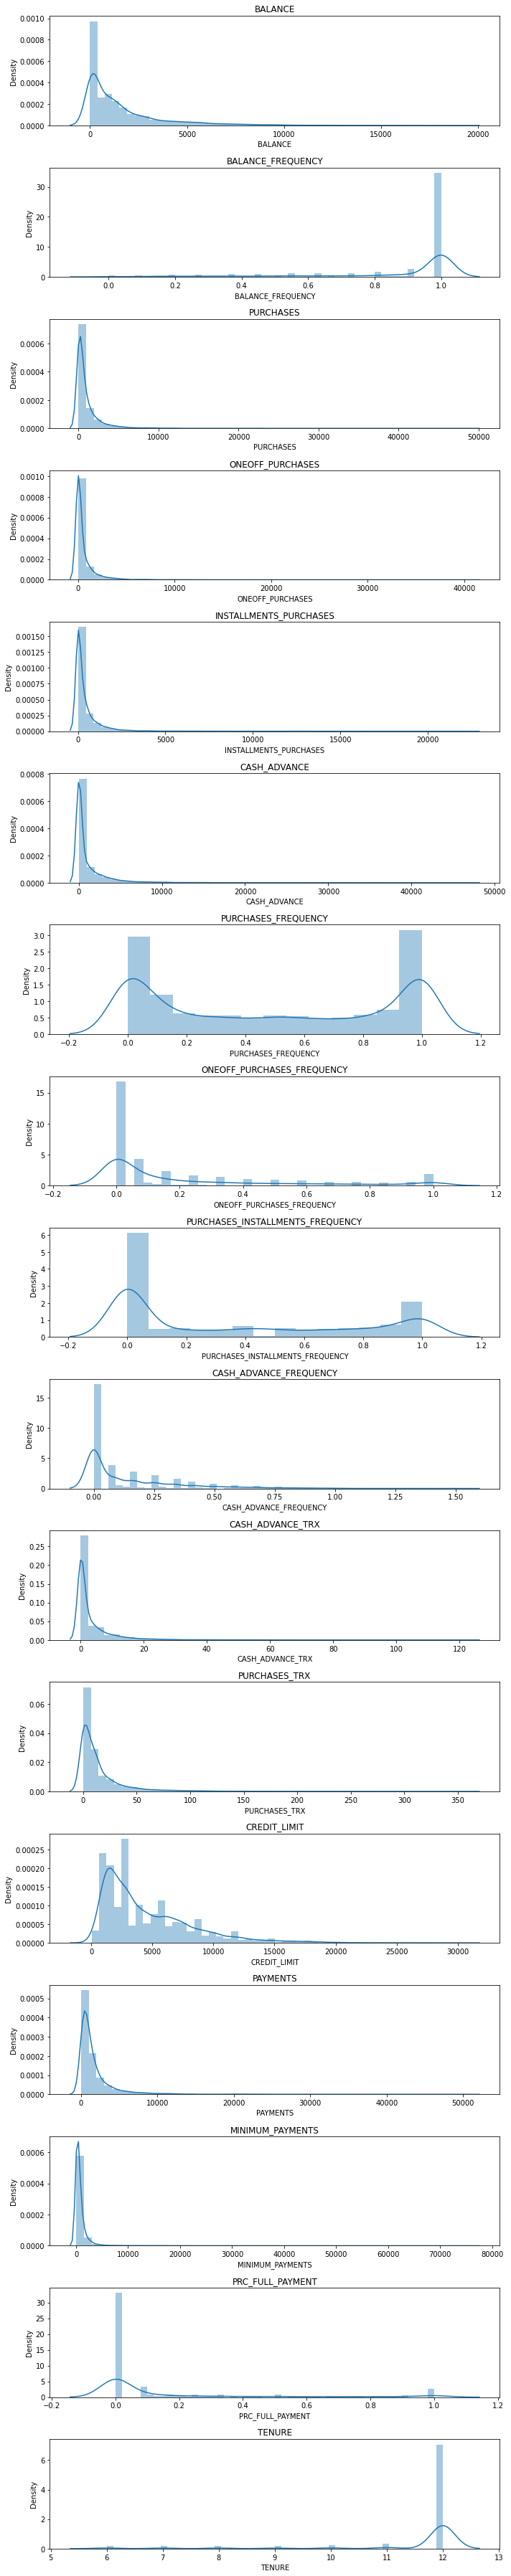

In [ ]:
#Criar um histograma com todos as colunas do nosso DF
plt.figure(figsize = (10,50))
num_columns = len(creditcard_df.columns)

for i, c in enumerate(creditcard_df.columns):
  plt.subplot(num_columns, 1, i+1) #plt.subplot(num de linhas, numero de colunas, id do gráfico)
  sns.distplot(creditcard_df[c], kde=True)    #além do histograma, irá gerar o KDE (Kernel Density Estimate) | gera a linha do formato da distribuição
  plt.title(c)
plt.tight_layout();

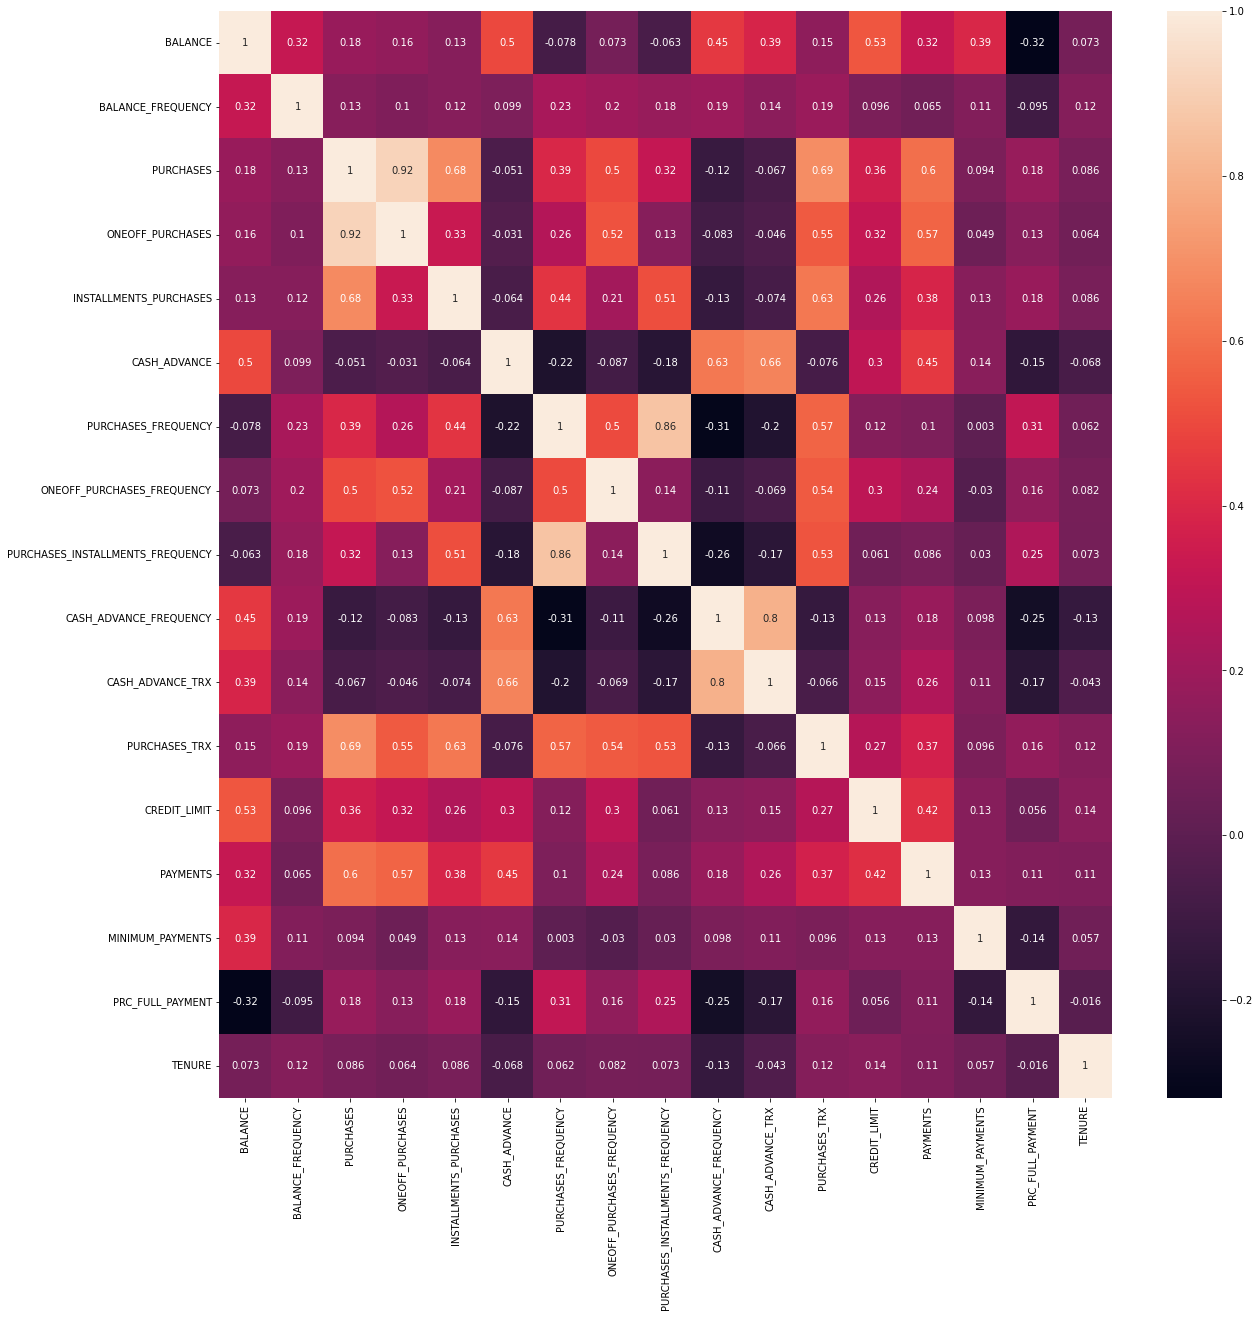

In [ ]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,20)) #Entre -1 e 1; Quanto mais próximo das extremidades, maior a correlação
sns.heatmap(correlations, annot=True)

## **Purchases x Oneoff_Purchases [0.92] | Purchases x Installments_Purchases [0.68]** 
Insight interessante: os maiores valores de compras no cartão de crédito estão relacionados a compras a vista, e não a parcelados  
________________________________________________________________________________

## **Purchases Installments Frequency x Purchases Frequency [0.86] | Purchases Oneoff Frequency x Purchases Frequency [0.50]**

É mais frequente a compra parcelada do que a vista  
________________________________________________________________________________

## **PRC_FULL_PAYMENT | BALANCE [-0.32]**

O percentual de pagamento da fatura completa é negativamente correlacionada com o saldo na conta corrente, ou seja, quanto maior o saldo na conta, menor a chance do cliente pagar a fatura completa

## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
#Não podemos deixar os atributos com escalas diferente porque o algoritmo pode considerar alguns campos mais importantes que outros
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

#StandardScaler() | utiliza a média e o desvio padrão | mais útil quando existe muitos outliers na base de dados
#MinMaxScaler()   | considera valores mínimos e máximos para colocar os valores no mesmo padrão

In [ ]:
#O tipo de dado muda, não é mais um DF, e sim um Numpy Array
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0]) 

(-0.9604333444542572, 0.36067954425377496)

In [ ]:
#Vamos realizar o teste Elbow Method (Método do cotovelo) calculando o WCSS
wcss_1 = []
range_values = range(1,21)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [ ]:
dif = wcss_1[0]
dif_difs = 0

for cont, i in enumerate(wcss_1):
  dif_ant = round(dif-i, 2)
  dif_difs = round((dif_ant - dif_difs) , 2)
  print(f'{cont+1}º Cluster: {round(i, 2)} | Diferença Cluster anterior: {dif_ant} | Dif da dif {dif_difs}')
  dif = i
  if dif_difs < 0: dif_difs = dif_difs*-1 

1º Cluster: 152150.0 | Diferença Cluster anterior: 0.0 | Dif da dif 0.0
2º Cluster: 127784.94 | Diferença Cluster anterior: 24365.06 | Dif da dif 24365.06
3º Cluster: 111986.7 | Diferença Cluster anterior: 15798.24 | Dif da dif -8566.82
4º Cluster: 99073.94 | Diferença Cluster anterior: 12912.76 | Dif da dif 4345.94
5º Cluster: 91503.39 | Diferença Cluster anterior: 7570.55 | Dif da dif 3224.61
6º Cluster: 84852.59 | Diferença Cluster anterior: 6650.8 | Dif da dif 3426.19
7º Cluster: 79529.16 | Diferença Cluster anterior: 5323.44 | Dif da dif 1897.25
8º Cluster: 74490.28 | Diferença Cluster anterior: 5038.88 | Dif da dif 3141.63
9º Cluster: 69858.32 | Diferença Cluster anterior: 4631.96 | Dif da dif 1490.33
10º Cluster: 66461.56 | Diferença Cluster anterior: 3396.76 | Dif da dif 1906.43
11º Cluster: 63637.22 | Diferença Cluster anterior: 2824.35 | Dif da dif 917.92
12º Cluster: 61357.26 | Diferença Cluster anterior: 2279.96 | Dif da dif 1362.04
13º Cluster: 59151.57 | Diferença Cluster

Text(0, 0.5, 'WCSS')

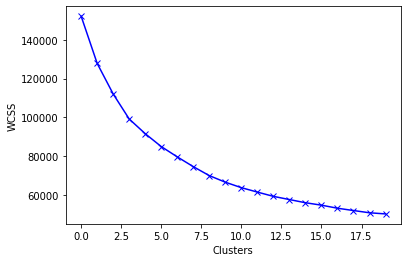

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

## Agrupamento com k-means

In [ ]:
n_clusters = 7
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(creditcard_df_scaled) #Treinameneto do algoritmo KMeans | Agrupar os clientes
labels = kmeans.labels_

In [ ]:
labels, len(labels) #Os clientes foram agrupados em grupos de 0 a 6

(array([5, 2, 7, ..., 0, 0, 0], dtype=int32), 8950)

In [ ]:
np.unique(labels, return_counts = True) #Contagem nos grupos

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([ 621, 1999,  860,  434, 1177, 2700,   30, 1082,   47]))

In [ ]:
kmeans.cluster_centers_ #É possível ver os valores médio de cada grupo

array([[-3.36031583e-01, -3.46960443e-01, -2.90846911e-01,
        -2.18146600e-01, -2.86565165e-01,  6.91451914e-02,
        -2.03666396e-01, -2.91031949e-01, -2.23433864e-01,
         3.10247758e-01,  1.76469536e-03, -3.88371845e-01,
        -5.68296480e-01, -3.92640022e-01, -2.09075226e-01,
         1.48802385e-02, -3.20586293e+00],
       [-3.71340175e-01,  3.32428466e-01, -3.47007070e-02,
        -2.42506495e-01,  3.63290619e-01, -3.61259473e-01,
         9.93422350e-01, -3.83150595e-01,  1.20809736e+00,
        -4.72286019e-01, -3.59075658e-01,  1.87109721e-01,
        -2.57141207e-01, -2.10554054e-01, -1.05626706e-01,
         3.22982989e-01,  2.56761060e-01],
       [ 1.67629449e+00,  3.91581008e-01, -2.17586028e-01,
        -1.54372219e-01, -2.30934937e-01,  2.02968000e+00,
        -4.74130148e-01, -2.07694747e-01, -4.11311361e-01,
         1.93779375e+00,  1.94875883e+00, -2.63255745e-01,
         1.02957661e+00,  8.29612153e-01,  3.88707955e-01,
        -3.90121820e-01,  6.8

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = creditcard_df.columns)
cluster_centers #Visão dos valores médios como DF

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336032,-0.346960,-0.290847,-0.218147,-0.286565,0.069145,-0.203666,-0.291032,-0.223434,0.310248,0.001765,-0.388372,-0.568296,-0.392640,-0.209075,0.014880,-3.205863
1,-0.371340,0.332428,-0.034701,-0.242506,0.363291,-0.361259,0.993422,-0.383151,1.208097,-0.472286,-0.359076,0.187110,-0.257141,-0.210554,-0.105627,0.322983,0.256761
2,1.676294,0.391581,-0.217586,-0.154372,-0.230935,2.029680,-0.474130,-0.207695,-0.411311,1.937794,1.948759,-0.263256,1.029577,0.829612,0.388708,-0.390122,0.068734
3,0.856749,0.467397,2.260838,1.783580,2.069053,-0.195241,1.163275,1.631984,1.213428,-0.306034,-0.212035,2.736465,1.249507,1.277711,0.262759,0.319680,0.333131
4,-0.701321,-2.147315,-0.312596,-0.237858,-0.302026,-0.321535,-0.557810,-0.448320,-0.438513,-0.520450,-0.375848,-0.420104,-0.178924,-0.203061,-0.256523,0.277666,0.199423
5,0.013521,0.403183,-0.361895,-0.247413,-0.401040,-0.091441,-0.865585,-0.411026,-0.756333,0.110349,-0.025445,-0.486837,-0.305078,-0.249743,-0.052118,-0.456925,0.272671
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.171810,0.386270,0.432961,0.575319,-0.033379,-0.339481,0.931395,1.870103,0.064915,-0.415995,-0.328450,0.507575,0.356660,0.068895,-0.163645,0.406804,0.258469
8,1.163735,0.469093,-0.082565,-0.289476,0.335922,-0.031983,-0.043428,-0.563574,0.200367,-0.207361,-0.055169,0.101552,-0.078881,-0.158967,10.186311,-0.525551,0.297085


In [ ]:
#Como os dados estão normalizados, fica difícil o entendimento, por isso, vamos fazer o processo inverso para visualizar melhor os grupos
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = creditcard_df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.053452,0.795079,381.805926,230.358696,151.930322,1123.871809,0.408609,0.115637,0.275639,0.197228,3.260870,5.056361,2426.754347,596.489461,376.965548,1.580669e-01,7.227053
1,791.561598,0.956020,929.066238,189.926258,739.586843,221.293123,0.889059,0.088156,0.844566,0.040635,0.798399,19.360680,3558.864533,1123.610496,618.047959,2.481816e-01,11.860930
2,5053.540303,0.970033,538.328930,336.211105,202.236047,5235.204888,0.300059,0.140498,0.200972,0.522917,16.547674,8.166279,8240.470402,4134.789747,1770.074034,3.961070e-02,11.609302
3,3347.726316,0.987993,5833.519194,3552.815346,2282.086336,569.441255,0.957229,0.689310,0.846685,0.073904,1.801843,82.728111,9040.668203,5431.991336,1476.556232,2.472157e-01,11.963134
4,104.735340,0.368592,335.339312,197.642005,137.949473,304.596210,0.266475,0.068715,0.190161,0.030997,0.683942,4.267630,3843.448976,1145.302906,266.389537,2.349272e-01,11.784197
5,1592.618581,0.972781,230.010607,181.781652,48.412244,787.114040,0.142949,0.079841,0.063851,0.157226,3.075185,2.608889,3384.450617,1010.162310,742.748581,2.007189e-02,11.882222
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,4.784091e-01,11.933333
7,1206.866572,0.968774,1928.233115,1547.349298,380.883817,266.964624,0.864164,0.760346,0.390236,0.051899,1.007394,27.326248,5792.123173,1932.589471,482.839907,2.726978e-01,11.863216
8,3986.690146,0.988395,826.803617,111.966170,714.837447,911.802007,0.472921,0.034333,0.444068,0.093649,2.872340,17.234043,4207.446809,1272.950449,24602.974168,-2.775558e-17,11.914894


In [ ]:
def save_cluster_centers():
  cluster_centers.to_excel('cluster_centers.xlsx', float_format = "%.2f")
  with open('agrupamentos_clientes.pkl', 'wb') as f:
    pickle.dump([cluster_centers, creditcard_df, labels, n_clusters, kmeans, scaler], f) 
    print('ok')

In [ ]:
save_cluster_centers() #Salvando variáveis